In [568]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [569]:
data=pd.read_csv('C:/Users/koush/Downloads/Titanic-Dataset.csv')


In [570]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [571]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [572]:
data=data.drop(columns=["PassengerId","Name","SibSp","Ticket","Cabin"])

In [573]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [574]:
data.describe()

,Survived,Pclass,Age,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.381594,32.204208
std,0.486592,0.836071,14.526497,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,6.000000,512.329200


In [575]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Parch         0
Fare          0
Embarked      2
dtype: int64

In [576]:
data["Fare"].fillna(data["Fare"].mean(), inplace=True)


In [577]:
data["Fare"].isnull().sum()

0

In [578]:
Age_data=data[["Survived","Pclass","Age","Fare"]]

In [579]:
with_null=Age_data.loc[Age_data["Age"].isnull()]
without_null=Age_data.loc[Age_data["Age"].notna()]

In [580]:
with_null.describe()

,Survived,Pclass,Age,Fare
count,177.000000,177.000000,0.0,177.000000
mean,0.293785,2.598870,NaN,22.158567
std,0.456787,0.763216,NaN,31.874608
min,0.000000,1.000000,NaN,0.000000
25%,0.000000,3.000000,NaN,7.750000
50%,0.000000,3.000000,NaN,8.050000
75%,1.000000,3.000000,NaN,24.150000
max,1.000000,3.000000,NaN,227.525000


In [581]:
without_null.describe()

,Survived,Pclass,Age,Fare
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,34.694514
std,0.491460,0.838250,14.526497,52.918930
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,1.000000,20.125000,8.050000
50%,0.000000,2.000000,28.000000,15.741700
75%,1.000000,3.000000,38.000000,33.375000
max,1.000000,3.000000,80.000000,512.329200


In [582]:
from sklearn.linear_model import LinearRegression

In [583]:
age_prediction=LinearRegression()

age_prediction.fit(without_null.drop("Age",axis=1),without_null['Age'])

LinearRegression()

In [584]:
result_age_prediction=age_prediction.predict(with_null.drop('Age',axis=1))

In [585]:
result_age_prediction

array([26.4695118 , 28.60608629, 19.69770102, 26.51478941, 19.67368366,
       26.49016262, 32.82459482, 19.67842692, 19.69754683, 26.49016262,
       26.48450154, 26.21099289, 19.67842692, 25.98413857, 36.90045382,
       44.00313664, 19.40323683, 26.49016262, 26.48450154, 19.6770502 ,
       26.48450154, 26.48450154, 26.49016262, 19.67750911, 19.07634076,
       26.48450154, 26.49551531, 19.14211867, 26.22032522, 26.51157706,
       26.46201509, 24.22667843, 36.18455868, 44.06906507, 25.84508971,
       24.22667843, 35.34791391, 43.18520993, 19.3939045 , 26.49551531,
       19.67842692, 24.22667843, 26.49551531, 26.49016262, 25.84508971,
       26.50285783, 26.24938689, 19.3939045 , 26.5138716 , 35.29611446,
       26.49551531, 26.49551531, 43.88274878, 19.67842692, 35.90043811,
       44.06631163, 44.00313664, 37.08401667, 19.67842692, 19.10938207,
       28.62994947, 26.48450154, 34.13293906, 24.22667843, 19.10938207,
       33.29711497, 26.49016262, 19.37187695, 43.73589849, 26.51

In [586]:
data.loc[data["Age"].isnull(),"Age"]=result_age_prediction

In [587]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [588]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,male,22.0,0,7.2500,S
1,1,1,female,38.0,0,71.2833,C
2,1,3,female,26.0,0,7.9250,S
3,1,1,female,35.0,0,53.1000,S
4,0,3,male,35.0,0,8.0500,S


In [589]:
average_age_of_surived=data["Age"].mean()
print(average_age_of_surived)

29.2865402605175


In [590]:
data['Sex_Encoded']=data['Sex'].map({"male":1,"female":2})

In [591]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Sex_Encoded
0,0,3,male,22.0,0,7.2500,S,1
1,1,1,female,38.0,0,71.2833,C,2
2,1,3,female,26.0,0,7.9250,S,2
3,1,1,female,35.0,0,53.1000,S,2
4,0,3,male,35.0,0,8.0500,S,1


In [592]:
data[["Sex","Sex_Encoded"]].head(10)

,Sex,Sex_Encoded
0,male,1
1,female,2
2,female,2
3,female,2
4,male,1
5,male,1
6,male,1
7,male,1
8,female,2
9,female,2


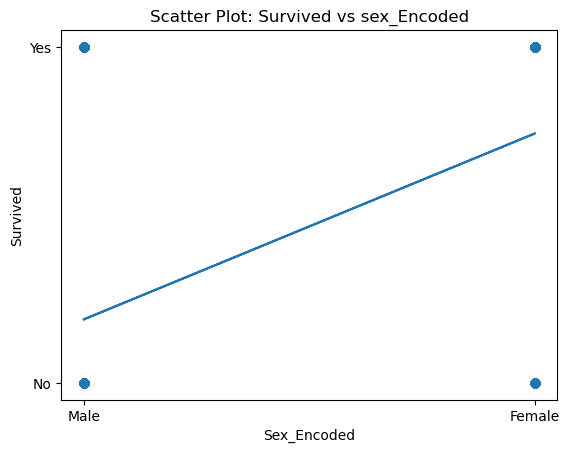

In [593]:
plt.scatter(data["Sex_Encoded"],data["Survived"])
z=np.polyfit(data['Sex_Encoded'],data['Survived'],1)
p=np.poly1d(z)  
plt.plot(data['Sex_Encoded'],p(data['Sex_Encoded']))

plt.xlabel('Sex_Encoded')
plt.ylabel('Survived')

plt.title('Scatter Plot: Survived vs sex_Encoded')
plt.yticks([0,1],['No','Yes'])
plt.xticks([1,2],['Male','Female'])
plt.show()